# Basics of Network Representation Learning

In this notebook we will make use of the [Karate club network](https://www.jstor.org/stable/3629752)

In [1]:
from NetworkAnalysis.UndirectedInteractionNetwork import UndirectedInteractionNetwork

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Read in network
karate_nw = pd.read_csv("~/karate_edges.csv", sep=',', header=None, names=['PersonA', 'PersonB'])
print(karate_nw.head())
karate_obj = UndirectedInteractionNetwork(karate_nw, keeplargestcomponent=True)

print(f"The network has {karate_obj.N_nodes} number of nodes and {karate_obj.interactions.shape[0]} edges")

   PersonA  PersonB
0        0        1
1        0        1
2        0        2
3        0        3
4        0        4
Object is a fully connected graph, returning object copy.
34 Nodes and 78 interactions
The network has 34 number of nodes and 78 edges


/home/bioit/pstrybol/anaconda3/envs/networkAnalysis_public/lib/python3.10/site-packages/NetworkAnalysis/Graph.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.interactions.rename(columns={old_col_names[0]: 'Gene_A',


In [3]:
# Read in the labels for each node
karate_labels = pd.read_csv("~/karate_labels.csv", sep=',', header=None, names=['Person', 'Club'], skiprows=1)
print(karate_labels.head(n=16))

color_map = {"Mr. Hi": "red", "Officer": "green"}
node2color = {str(i):color_map[karate_labels.loc[i, 'Club']] for i in karate_obj.nodes}

    Person     Club
0        0   Mr. Hi
1        1   Mr. Hi
2        2   Mr. Hi
3        3   Mr. Hi
4        4   Mr. Hi
5        5   Mr. Hi
6        6   Mr. Hi
7        7   Mr. Hi
8        8   Mr. Hi
9        9  Officer
10      10   Mr. Hi
11      11   Mr. Hi
12      12   Mr. Hi
13      13   Mr. Hi
14      14  Officer
15      15  Officer


/home/bioit/pstrybol/anaconda3/envs/networkAnalysis_public/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


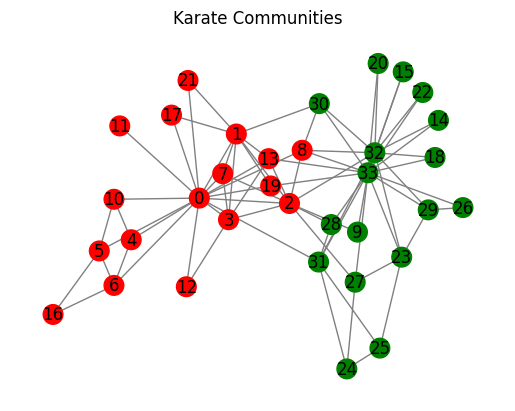

In [4]:
# Visualize the network using the function 'visualize' from the class object

karate_obj.visualize(show_labels=True,
                     node_colors=node2color, cmap='spectral',
                     title="Karate Communities",
                     color_scheme_edges=('gray', 'tab:green'),
                     labels_dict=None,
                     filename=None,
                     save_path=None)

In [5]:
# Use one of the shallow encoding methods from OpenNe (https://github.com/thunlp/OpenNE) to embed the graph. 
# An example with DeepWalk is provided, if there is time left you can try other methods. 
# Follow the instructions at the repo of OpenNE for installation
karate_obj.list_embedding_methods()

# Embed the graph and construct a dataframe for visualization, now using the default parameters except for the dimension and epoch
embeddings = karate_obj.generateEmbeddings(method='DeepWalk', dimensions=2, epochs=50)


Laplacian - GF - HOPE - GraRep - DeepWalk - node2vec - LINE - SDNE

Walk iteration:
1 / 32
2 / 32
3 / 32
4 / 32
5 / 32
6 / 32
7 / 32
8 / 32
9 / 32
10 / 32
11 / 32
12 / 32
13 / 32
14 / 32
15 / 32
16 / 32
17 / 32
18 / 32
19 / 32
20 / 32
21 / 32
22 / 32
23 / 32
24 / 32
25 / 32
26 / 32
27 / 32
28 / 32
29 / 32
30 / 32
31 / 32
32 / 32
Learning representation...


In [6]:
df = pd.DataFrame(embeddings, index=['dim1', 'dim2']).transpose()
df['group'] = [karate_labels.loc[int(i), 'Club'] for i in df.index]
print(df.head())

       dim1      dim2   group
0  0.206739  0.844552  Mr. Hi
1  0.053800  0.767125  Mr. Hi
2 -0.181976  0.713694  Mr. Hi
3  0.211642  0.834346  Mr. Hi
4  0.531481  0.935143  Mr. Hi


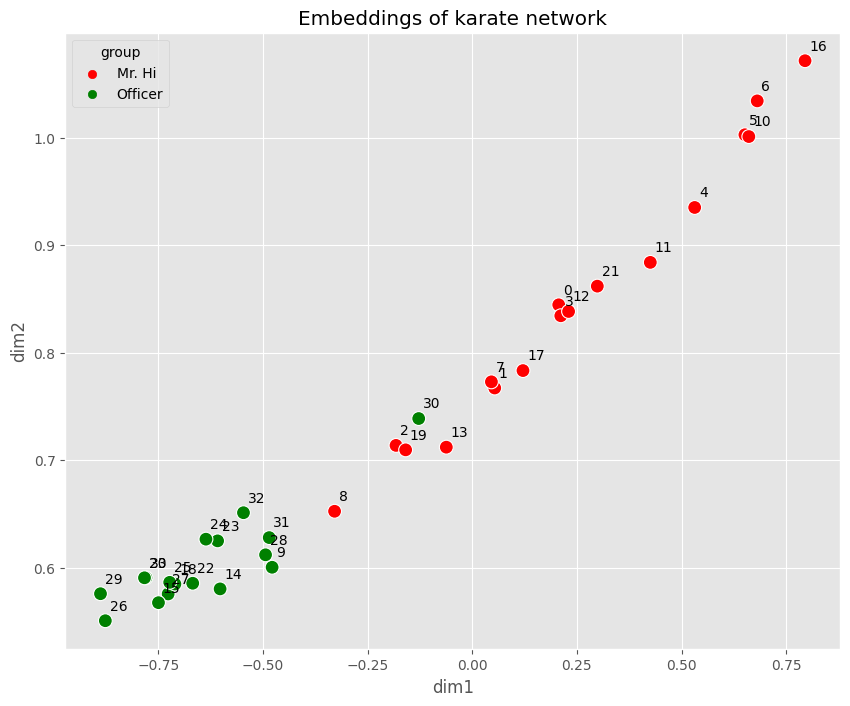

In [7]:
# Visualize the embedded graph occording to each node's original group and compare with the original network. 

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.scatterplot(data=df, x='dim1', y='dim2', hue='group', ax=ax1, palette=color_map, s=100)
for i in range(df.shape[0]):
 ax1.text(x=df.dim1[i]+0.01,y=df.dim2[i]+0.01,s=df.index[i], 
          fontdict=dict(color='black',size=10))
ax1.set_title("Embeddings of karate network")
plt.show()